In [92]:
import numpy as np
import pandas as pd

In [93]:
df = pd.read_csv('CreditPrediction.csv' , na_values='Unknown')

X = df.drop(['Customer_Age','Marital_Status','Gender','Unnamed: 19','CLIENTNUM'] , axis=1)

X.isna().sum()

Dependent_count                0
Education_Level             1522
Income_Category             1122
Card_Category               1924
Months_on_book               223
Total_Relationship_Count      20
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [96]:
Education_Level_Dic = {'High School':1, 'Uneducated':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6}
X.replace({'Education_Level': Education_Level_Dic},inplace=True)


Income_Category_Dic = {'Less than $40K':0, '$40K - $60K':1, '$80K - $120K':3, '$60K - $80K':2,'$120K +':4}
X.replace({'Income_Category': Income_Category_Dic},inplace=True)


Card_Category_Dic = {'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3}
X.replace({'Card_Category': Card_Category_Dic},inplace=True)

X['Education_Level'].fillna(X['Education_Level'].mode()[0] , inplace=True)

X['Total_Relationship_Count'].fillna(X['Total_Relationship_Count'].mode()[0] ,inplace=True)
X.isna().sum()

Dependent_count                0
Education_Level                0
Income_Category             1122
Card_Category               1924
Months_on_book               223
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

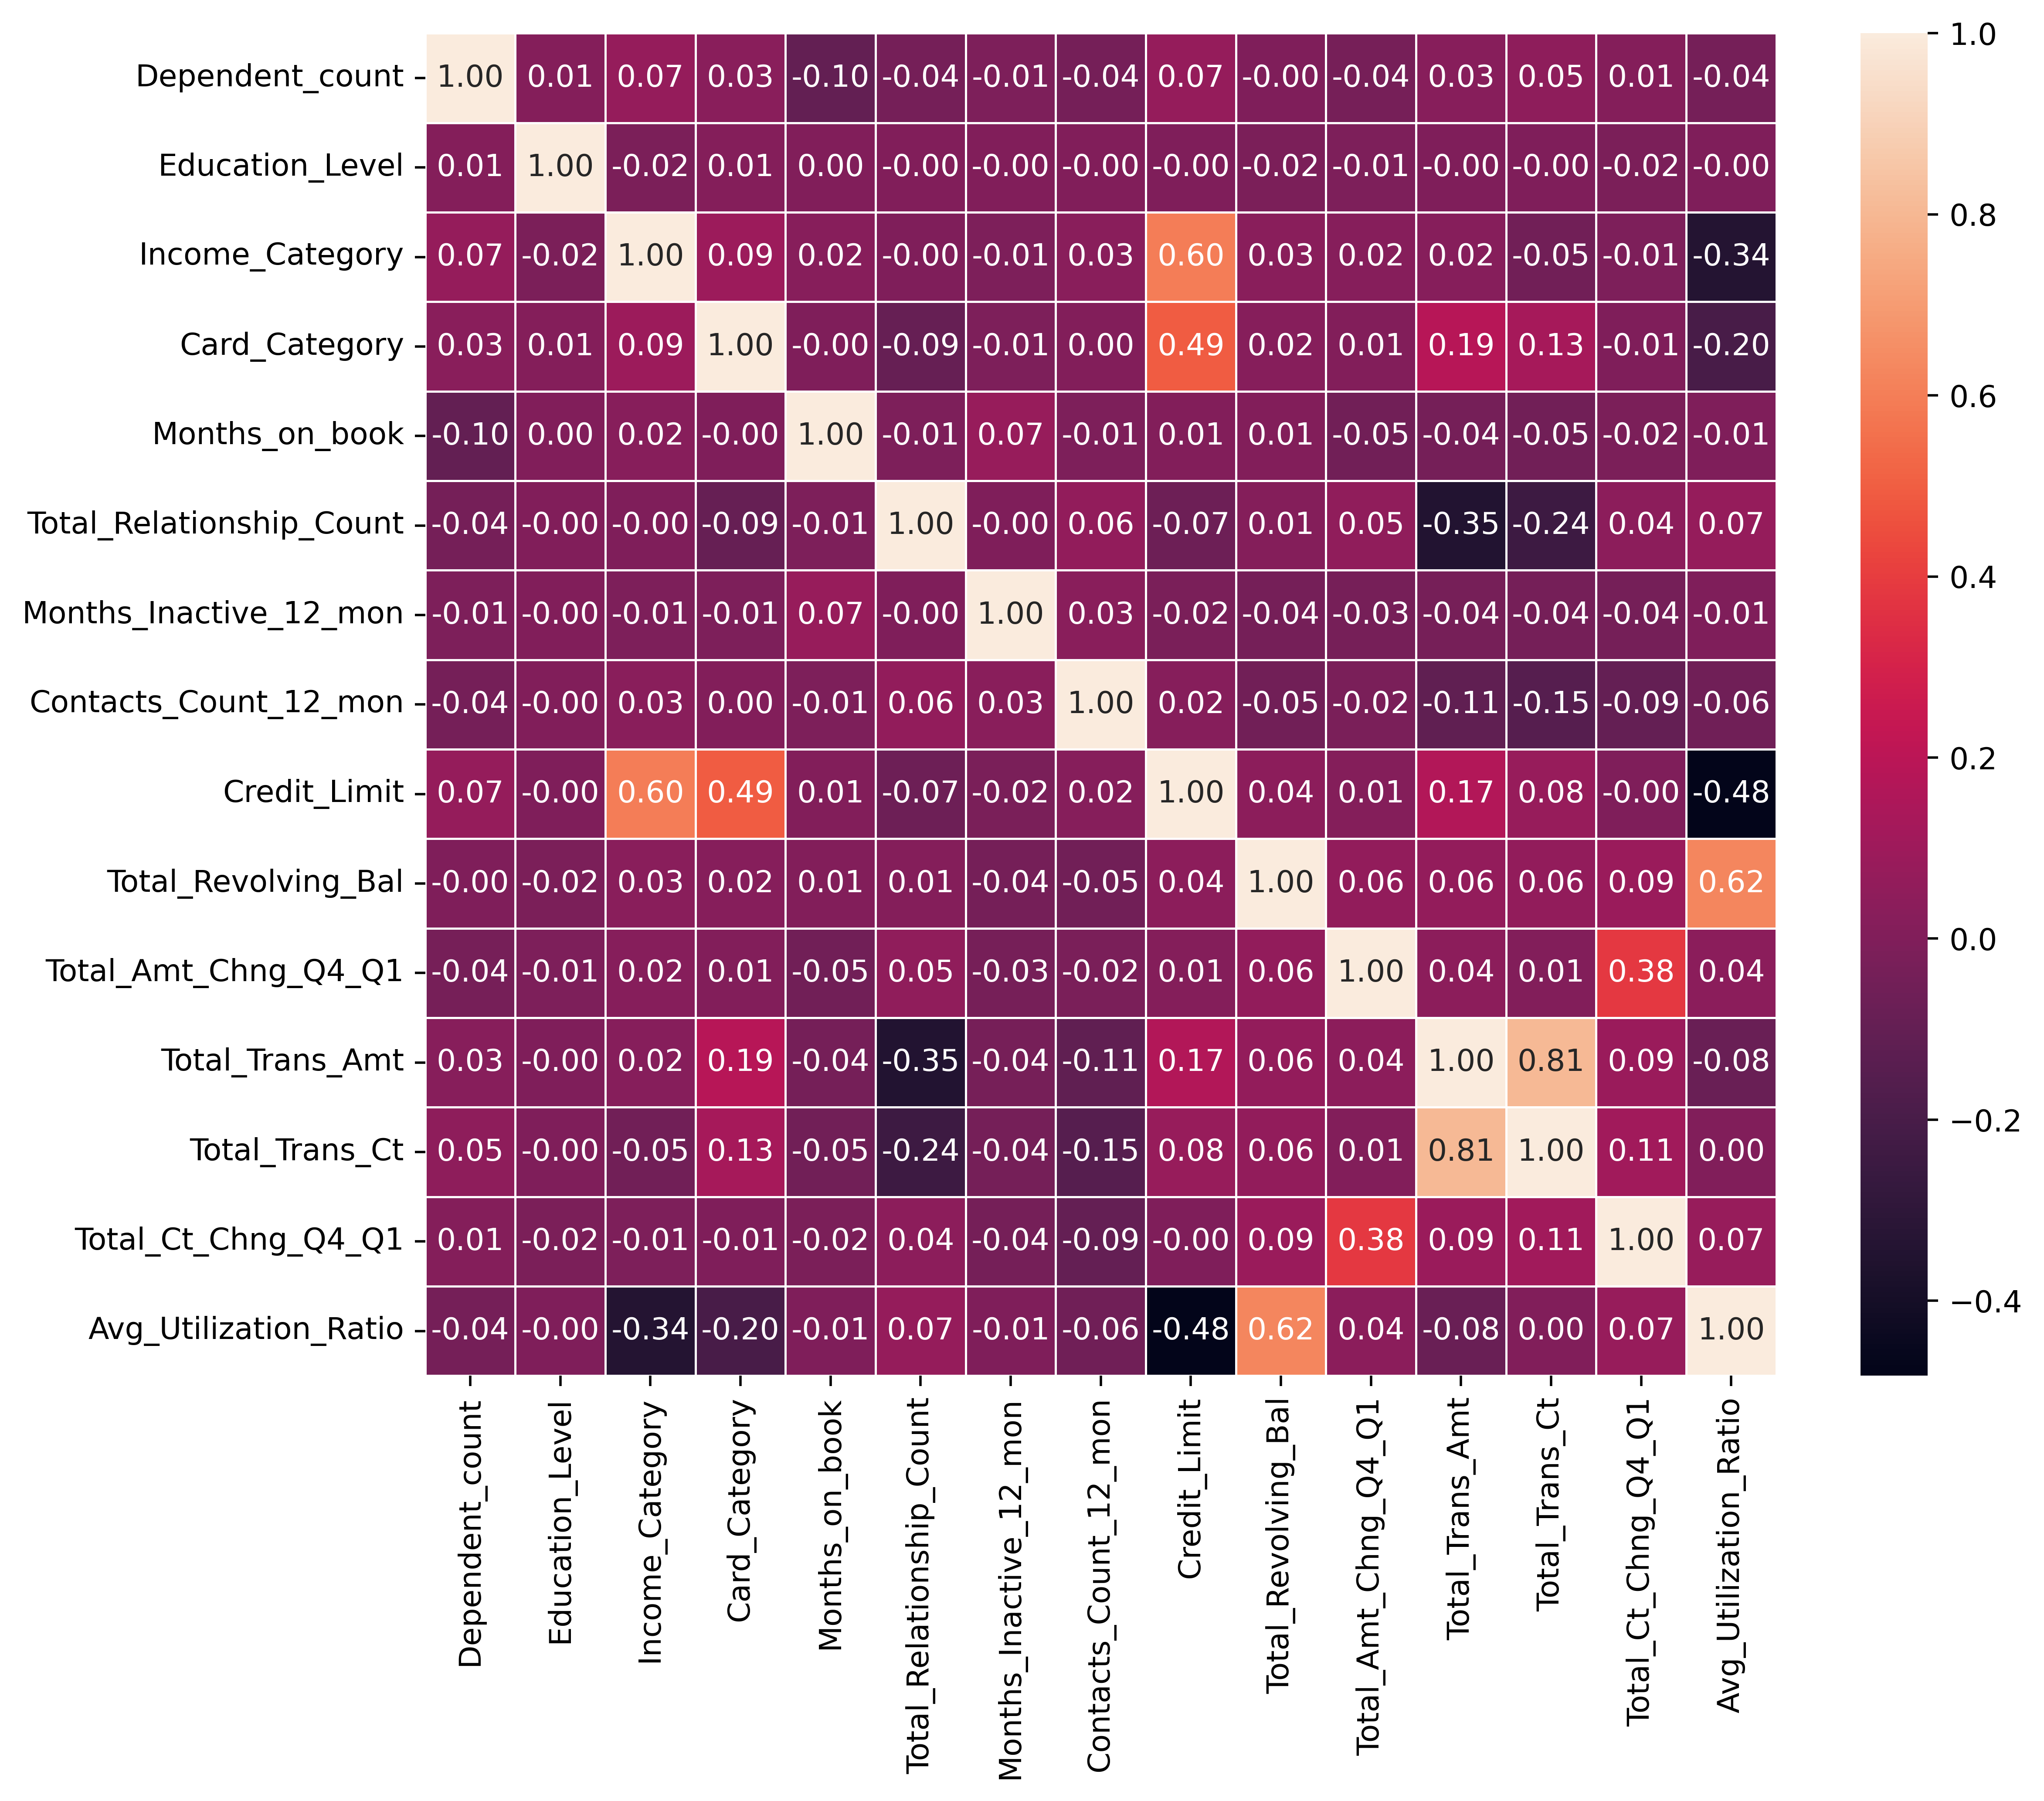

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr(method = 'pearson')
corr
 
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.savefig('corr.png')
plt.show()

In [98]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans


X_Clus = X.drop(['Income_Category', 'Card_Category' , 'Months_on_book'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_Clus)
 

X_normalized = normalize(X_scaled)
 
X_normalized = pd.DataFrame(X_normalized)

In [100]:
pca = PCA(n_components = 3)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2' , 'P3']

In [101]:
kmeans = KMeans(n_clusters=10, random_state=0)
ac = kmeans.fit(X_normalized)
c = ac.fit_predict(X_normalized)

ac = kmeans.fit(X_principal)
c2 = ac.fit_predict(X_principal)

In [102]:
print ('silhouette_score with out pca: ' , silhouette_score(X_normalized, c))
print ('silhouette_score with pca: ' , silhouette_score(X_principal, c2))

silhouette_score with out pca:  0.11471451594848583
silhouette_score with pca:  0.2625203249147169


In [76]:
X = pd.concat([X , pd.DataFrame({'0':c})],axis = 1)

In [77]:
for i in range(10):
    X.loc[X['0'] == i, '0'] = X.loc[X['0'] == i].value_counts('Card_Category').argmax()

In [78]:
X['Card_Category'].fillna(X['0'] , inplace=True)
X.value_counts('Card_Category')

Card_Category
0.0    9590
1.0     464
2.0      97
3.0      16
Name: count, dtype: int64

In [79]:
X = pd.concat([X , pd.DataFrame({'1':c})],axis = 1)

for i in range(10):
    X.loc[X['1'] == i, '1'] = X.loc[X['1'] == i].value_counts('Income_Category').argmax()

In [80]:
X['Income_Category'].fillna(X['1'] , inplace=True)


In [81]:
X = pd.concat([X , pd.DataFrame({'2':c})],axis = 1)

for i in range(10):
    X.loc[X['2'] == i, '2'] = X.loc[X['2'] == i].value_counts('Months_on_book').argmax()

In [82]:
X['Months_on_book'].fillna(X['1'] , inplace=True)
X.isna().sum()

Dependent_count             0
Education_Level             0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
0                           0
1                           0
2                           0
dtype: int64

In [83]:
X=X.drop(['2', '1', '0'], axis=1)

In [85]:

# X = X.drop('Total_Trans_Ct', axis=1)

y = X['Credit_Limit']

X.drop(['Credit_Limit'],axis=1,inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
X = pd.DataFrame(X_scaled , columns=X.columns)

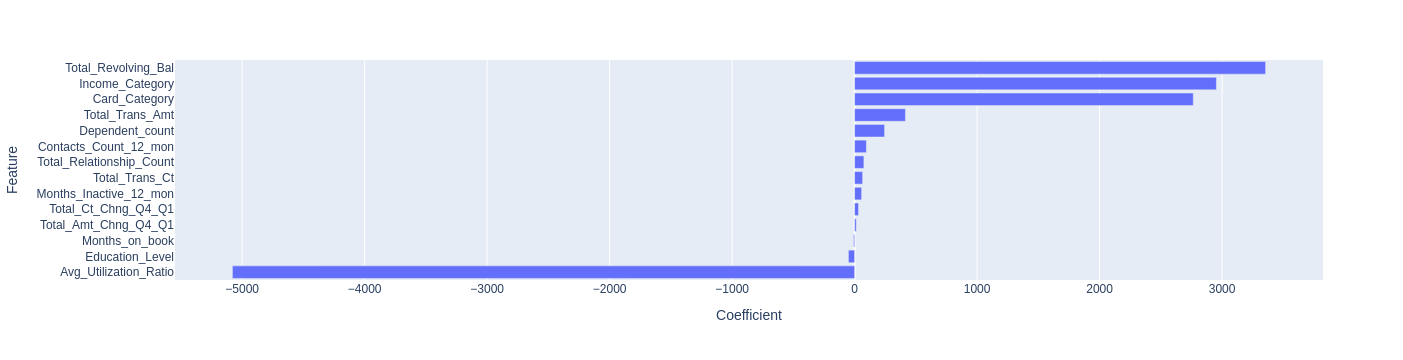

/home/mamad/Desktop/.venv/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `Coefficient.png` didn't end with .html. Adding .html to the end of your file.



'Coefficient.png.html'

In [86]:
import plotly.express as px
import plotly
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,shuffle=True,random_state=41)

lr = LinearRegression()

lr.fit(X_train,y_train)

bar_chart = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr.coef_})

fig = px.bar(bar_chart, x='Coefficient', y='Feature')

fig.update_layout(height=1200,
                  yaxis={'categoryorder':'total ascending'})
fig.show()
plotly.offline.plot(fig,filename='Coefficient.png')

In [87]:
coef = pd.DataFrame(np.sort(lr.coef_ )[::-1].reshape(1,14) , columns=X_train.columns)
coef

,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3355.145723,2953.469526,2764.680836,414.811465,244.481966,95.907843,75.588379,65.493542,56.842504,32.02257,13.355383,-8.495127,-50.601766,-5079.62867


In [88]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

y_pred = lr.predict(X_test)
print(f'r2 score of linear : ', r2_score(y_test, y_pred))
scores_without_ridge = []
scores_without_ridge.append(r2_score(y_test, y_pred))

for i in range(2,5):
    poly = PolynomialFeatures(degree=i)
    X_train_trans = poly.fit_transform(X_train)
    X_test_trans = poly.transform(X_test)

    lr.fit(X_train_trans, y_train)
    y_pred = lr.predict(X_test_trans)
    
    scores_without_ridge.append(r2_score(y_test, y_pred))
    print(f'r2 score of degree {i} : ', r2_score(y_test, y_pred))

r2 score of linear :  0.607482123903178
r2 score of degree 2 :  0.7681213298577707
r2 score of degree 3 :  0.8129019821089438
r2 score of degree 4 :  -4.815402253556546e+17


In [107]:
from sklearn.linear_model import Ridge

scores_with_ridge = []

for j in range(1,20):

    degree_scores = []
    lr = Ridge(j)
    print(f'alpha = {j}:')
    for i in range(1,5):

        poly = PolynomialFeatures(degree=i)
        X_train_trans = poly.fit_transform(X_train)
        X_test_trans = poly.transform(X_test)
    
        lr.fit(X_train_trans, y_train)
        y_pred = lr.predict(X_test_trans)
        
        degree_scores.append(r2_score(y_test, y_pred))
        print(f'r2 score of degree {i} : ', r2_score(y_test, y_pred))
    scores_with_ridge.append(degree_scores)

alpha = 1:
r2 score of degree 1 :  0.6074728867390022
r2 score of degree 2 :  0.7680774657020729
r2 score of degree 3 :  0.8132045001639318
r2 score of degree 4 :  0.439935410341997
alpha = 2:
r2 score of degree 1 :  0.6074636210123547
r2 score of degree 2 :  0.7680334971421423
r2 score of degree 3 :  0.8133480470742496
r2 score of degree 4 :  0.4558045681212112
alpha = 3:
r2 score of degree 1 :  0.6074543267889627
r2 score of degree 2 :  0.7679894264410325
r2 score of degree 3 :  0.8134198723050846
r2 score of degree 4 :  0.4674949915267762
alpha = 4:
r2 score of degree 1 :  0.6074450041343746
r2 score of degree 2 :  0.7679452555850683
r2 score of degree 3 :  0.813451717630224
r2 score of degree 4 :  0.47651378321565097
alpha = 5:
r2 score of degree 1 :  0.6074356531139604
r2 score of degree 2 :  0.7679009863092751
r2 score of degree 3 :  0.8134584105623583
r2 score of degree 4 :  0.48374479030843887
alpha = 6:
r2 score of degree 1 :  0.6074262737929124
r2 score of degree 2 :  0.76785

max score: 
degree: 3 	 alpha: 5 
score:  0.8134584105623583


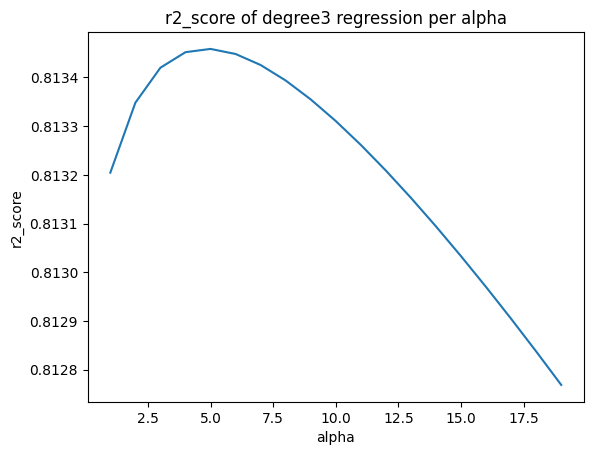

In [108]:
degree3_scores = []
for i in range(19):
    degree3_scores.append(scores_with_ridge[i][2])
    
plt.plot(range(1,20) , degree3_scores)
plt.xlabel('alpha') 
plt.ylabel('r2_score') 
plt.title('r2_score of degree3 regression per alpha');

print(f'max score: \ndegree: 3 \t alpha: {degree3_scores.index(max(degree3_scores))+1} \nscore: ', max(degree3_scores))

In [124]:
from sklearn.ensemble import RandomForestRegressor

regressor_score = []

for i in range(2,50):
    regressor = RandomForestRegressor(n_estimators=i, random_state=0)

    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    regressor_score.append(r2_score(y_pred, y_test))

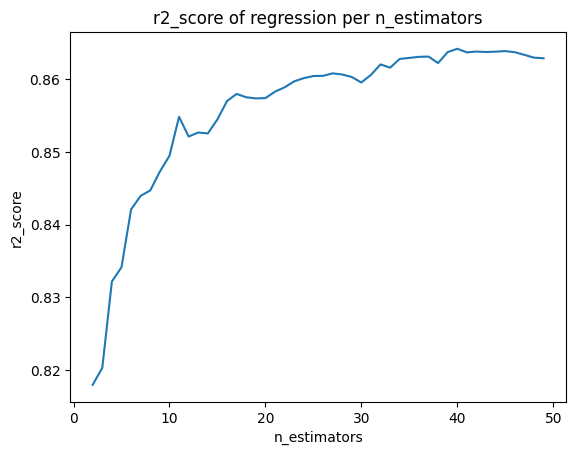

In [126]:
plt.plot(range(2,50) , regressor_score)
plt.xlabel('n_estimators') 
plt.ylabel('r2_score') 
plt.title('r2_score of regression per n_estimators');

In [128]:
print(f'n_estimators: {regressor_score.index(max(regressor_score))+1} \nscore: ', max(regressor_score))

n_estimators: 39 
score:  0.8641181814824872
